# HR-ANALYTICS

* People Charm, a growing company is facing a high attrition rate among their employees which in turn affects              their business due to lack of expertise and experience.<br/>

* Their HR department is assigned the task to reduce the attrition rate by retaining employees who are about                  to churn out.<br/>

* They need to recommend special plans or strategies which will help them to retain their employees which in                   turn will help them to grow bigger as a company.<br/>

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [135]:
# Importing data 
os.chdir("G:\Advanced Python\source")
data=pd.read_csv("PeopleCharm.csv")

In [136]:
df = data.copy()
df1 = data.copy()

# Understanding the data

In [137]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [7]:
df.shape

# There are 14999 employees and 10 features

(14999, 10)

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

# Summary of Numerical variables

In [106]:
Summary_statistics = df.describe()

In [107]:
print(Summary_statistics)

       satisfactoryLevel  lastEvaluation  avgMonthlyHours
count       14999.000000    14999.000000     14999.000000
mean            0.612834        0.716102       201.050337
std             0.248631        0.171169        49.943099
min             0.090000        0.360000        96.000000
25%             0.440000        0.560000       156.000000
50%             0.640000        0.720000       200.000000
75%             0.820000        0.870000       245.000000
max             1.000000        1.000000       310.000000


# Summary of Categorical variables

In [108]:
Summary_object = df.describe(include = 'object')

In [109]:
Summary_object

,numberOfProjects,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
count,14999,14999,14999,14999,14999,14999,14999
unique,6,8,2,2,2,10,3
top,4,3,0,0,0,sales,low
freq,4365,6443,12830,11428,14680,4140,7316


In [15]:
# Missing values

df.isnull().sum()

# There is null values in the dataset

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [138]:
#Duplicate record

print(len(df[df.duplicated(subset = None, keep = "first")]))

# 3008 records are duplicate 

3008


In [139]:
# Removing the duplicate records

df.drop_duplicates(subset = None,keep = False,inplace = True)

In [111]:
print(len(df[df.duplicated(subset = None, keep = "first")]))

0


In [80]:
print("Number of Projects")
print(df['numberOfProjects'].value_counts())
#numberOfProjects consists of six values namely 2,3,4,5,6 and 7

print("------------------------------------")

print("Time Spent at the Company")
print(df['timeSpent.company'].value_counts())
#timeSpent.company consists of eight values namely 2,3,4,5,6,7,8 and 10

Number of Projects
4    3080
3    2997
5    1818
2    1080
6     597
7      81
Name: numberOfProjects, dtype: int64
------------------------------------
Time Spent at the Company
3    4240
2    2585
4    1620
5     798
6     410
Name: timeSpent.company, dtype: int64


In [81]:
print("Work Accident")
print(df['workAccident'].value_counts())
print("------------------------------------")

print("Left")
print(df['left'].value_counts())
print("------------------------------------")

print("Promotion in the last 5 years")
print(df['promotionInLast5years'].value_counts())
#workAccident, left and promotionInLast5years have two values 0 and 1 

Work Accident
0    8094
1    1559
Name: workAccident, dtype: int64
------------------------------------
Left
0    8572
1    1081
Name: left, dtype: int64
------------------------------------
Promotion in the last 5 years
0    9561
1      92
Name: promotionInLast5years, dtype: int64


In [84]:
print("Department")
print(df['dept'].value_counts())
#dept comprises of 10 different values.
print("------------------------------------")

print("Salary")
print(df['salary'].value_counts())
#salary consists of three levels; low, medium and high

Department
sales          2532
technical      1899
support        1515
IT              774
RandD           616
marketing       526
accounting      517
hr              508
product_mng     508
management      258
Name: dept, dtype: int64
------------------------------------
Salary
low       4594
medium    4302
high       757
Name: salary, dtype: int64


In [83]:
# Unique values

df.nunique()

satisfactoryLevel         92
lastEvaluation            65
numberOfProjects           6
avgMonthlyHours          215
timeSpent.company          5
workAccident               2
left                       2
promotionInLast5years      2
dept                      10
salary                     3
dtype: int64

# Exploratory Data Analysis

In [27]:
# Visualizing the categorical variable

#Dropping the continous variable

df_cat = df.copy()

df_cat = df_cat.drop(['satisfactoryLevel','lastEvaluation','avgMonthlyHours'],axis = 1)

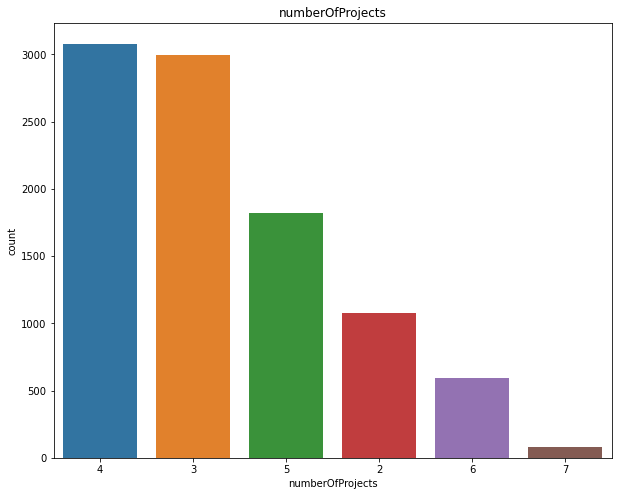

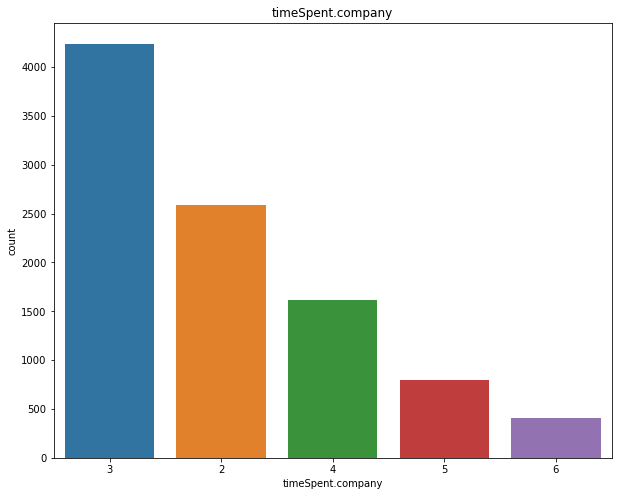

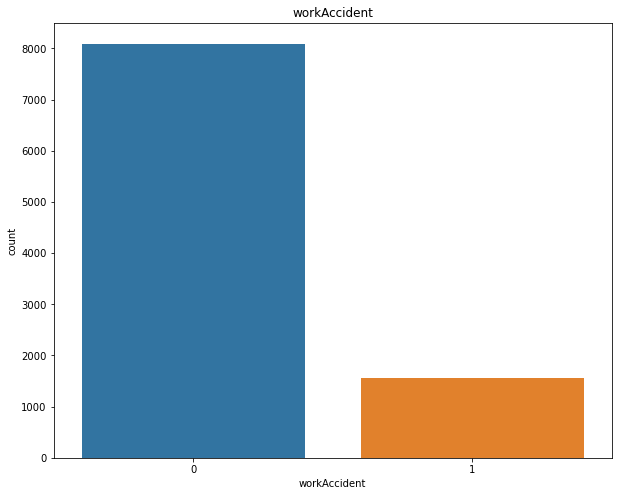

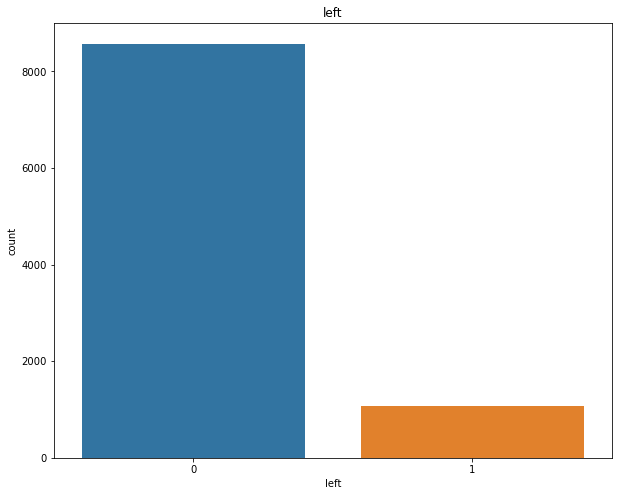

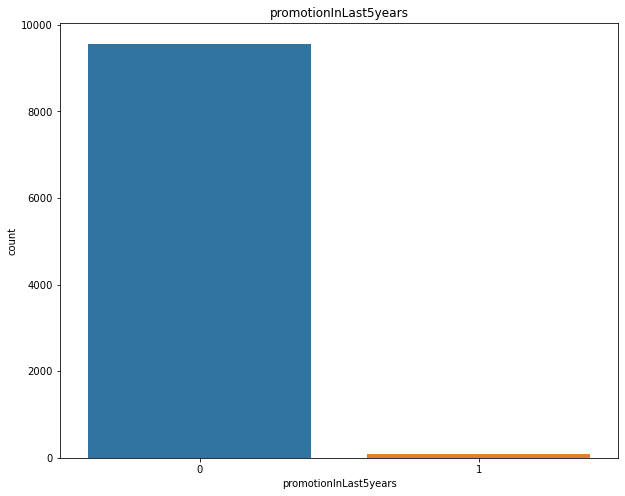

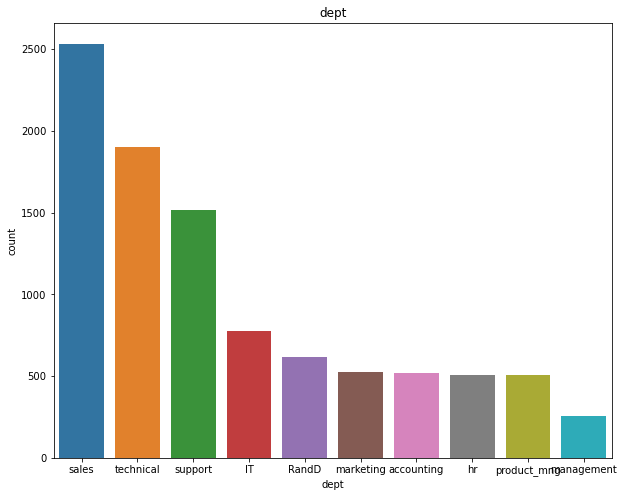

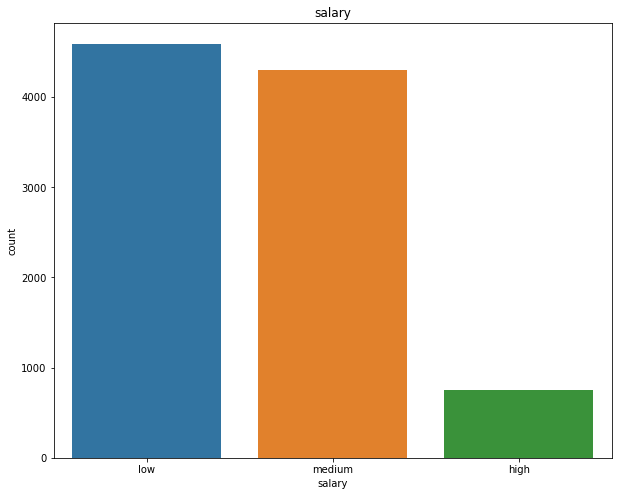

In [28]:
# Plotting for categorical variable

for i in df_cat.columns:
    plt.figure(figsize = (10,8))
    sns.countplot(x = i,
                  data = df_cat,
                  order = df_cat[i].value_counts().index)
    plt.title(i)
    plt.show()

From the plots,

 * Most employees involve in 4 projects followed by 3 and 5, whereas the least number of projects is 7
 * Most of the employees spent 3 years in the company,only the experienced employees stayed upto 6 years
 * Few employees had a work accident of about 1559
 * Only few employees got promotion in last 5 years
 * sales department has the largest number of employees followed by technical,support,however, management the least
 * Many employees are getting low salary.
 
 



Text(0.5, 1.0, 'Satisfactory Level')

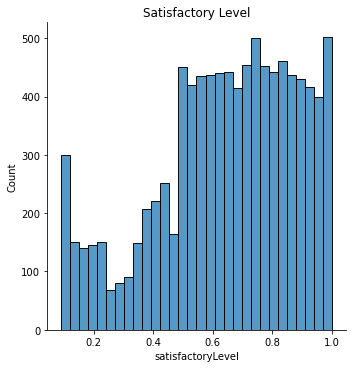

In [85]:
# Continous variable
# satisfactoryLevel
sns.displot(df['satisfactoryLevel'])
plt.title("Satisfactory Level")
# Employees with a satisfactoryLevel between  0.4 and 1.0 are high in frequency
# We can see that the data is normally distributed. This can be interpreted even from the 
#describe() function where the mean is similar to the median.


Text(0.5, 1.0, 'Last Evaluation')

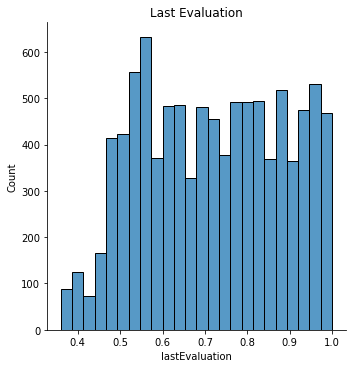

In [86]:
# lastEvaluation
sns.displot(df['lastEvaluation'])
plt.title("Last Evaluation")
# Employees with the evaluation level between  0.5 and 1.0 are high in frequency
# We can see that the data is normally distributed. This can be interpreted even from the 
#describe() function where the mean is similar to the median.

Text(0.5, 1.0, 'Average Monthly Hours')

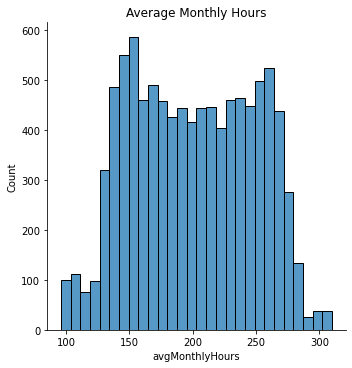

In [87]:
#avgMonthlyHours
sns.displot(df['avgMonthlyHours'])
plt.title("Average Monthly Hours")
# Most of the employees work for hours >=150 and <=275
# Employees who work for an average of 150 hours have the highest count greater than 700.

# We can see that the data is normally distributed. This can be interpreted even from the 
#describe() function where the mean is similar to the median.

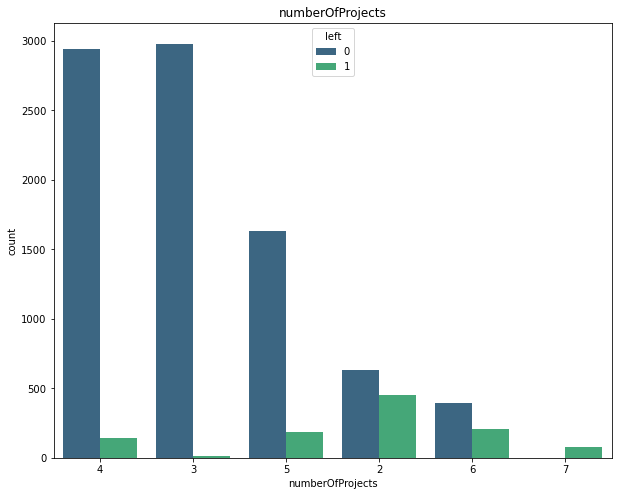

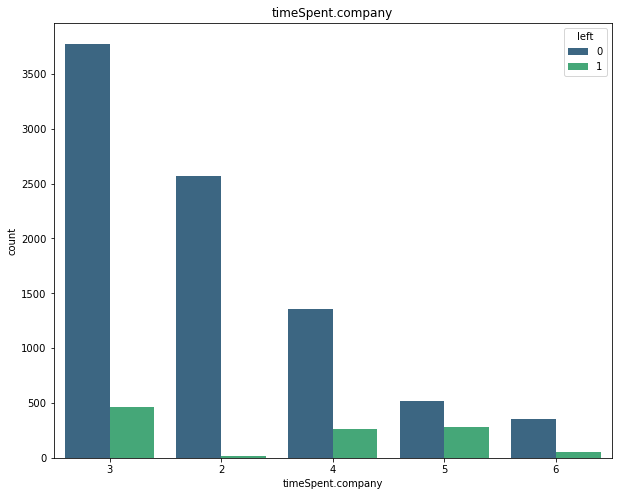

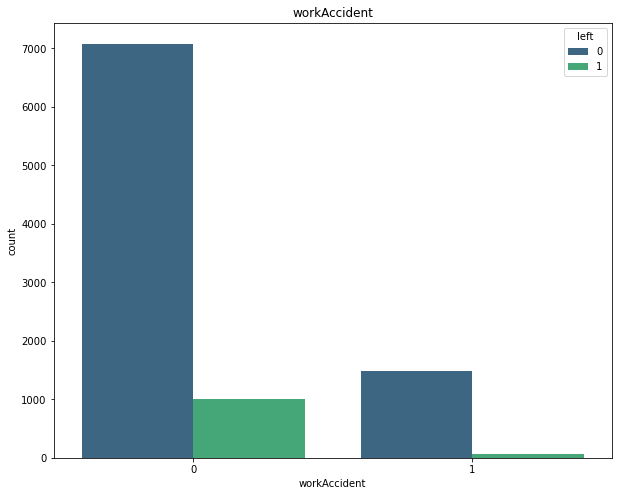

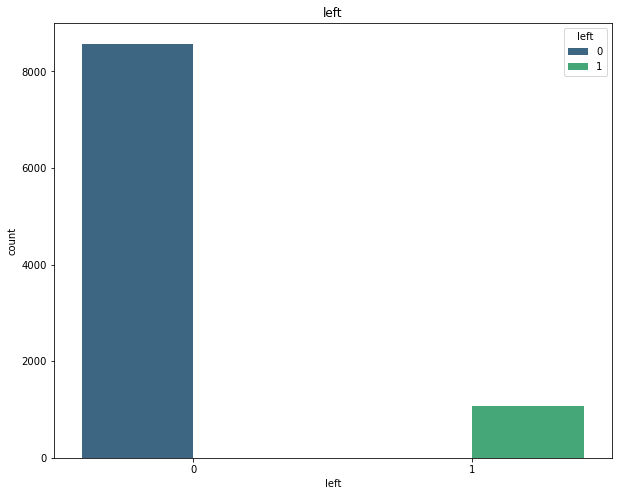

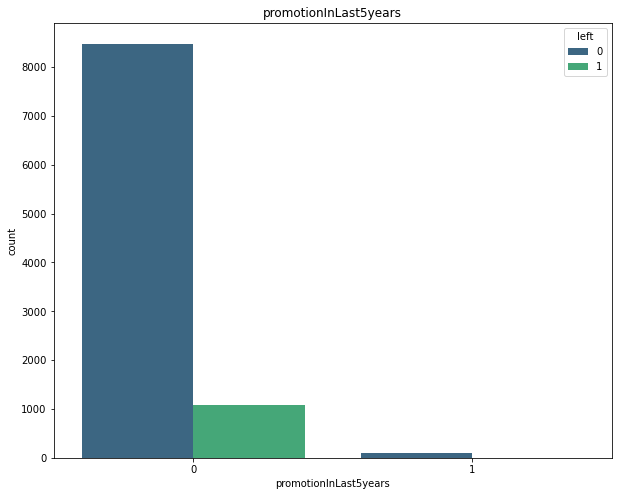

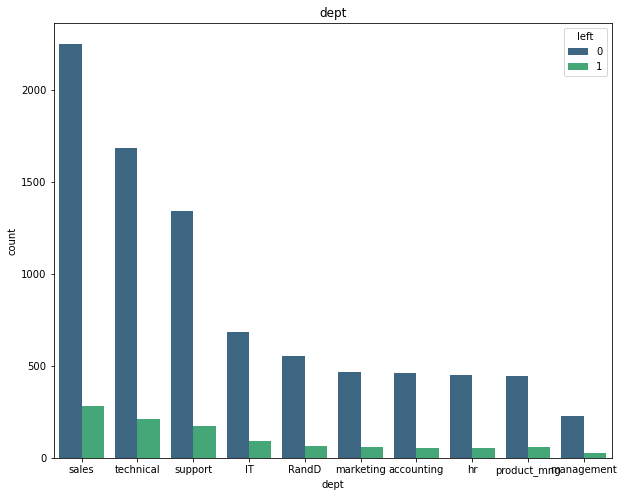

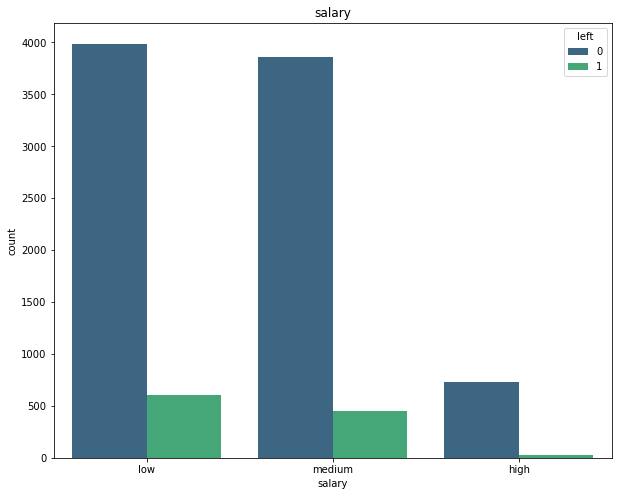

In [99]:
df_cat = df.drop(['satisfactoryLevel','lastEvaluation','avgMonthlyHours'],axis = 1)
for i in df_cat.columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data= df_cat, 
                  x= i,
                  hue='left',
                  palette='viridis',
                  order = df_cat[i].value_counts().index)
    plt.title(i)
    plt.show()

**INFERENCE**
* numberOfProjects:Employee tends to leave the company when they feel they have not participated in many of the company's projects

* timeSpent.company: A trend can be seen that an employee leaves the company after three years. If they stay at the company for seven years and more, they tend to stay with the company

* workAccident: If the employee is not involved in any work-related accidents during their time at the company, they may prefer to switch the job in the future.

* promotionInLast5years: When the employee hasn't been promoted in the last five year, there is a chance that he may leave the company

* dept: Employees working in Sales, Technical and Support are likely to leave the job. On the contrary , R&D, HR and Management people stay longer with the company.

* salary: Employees with a low salary tend to leave the company.

# Correlation

<AxesSubplot:>

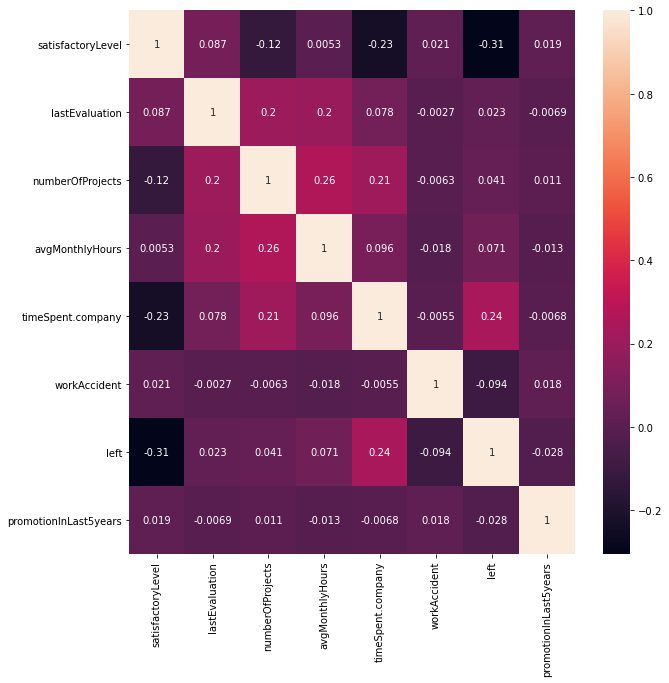

In [116]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True,cbar="BuPu")

# Model Building

In [142]:
df['numberOfProjects']=df['numberOfProjects'].astype(object)
df['timeSpent.company']=df['timeSpent.company'].astype(object)
df['workAccident']=df['workAccident'].astype(object)
df['promotionInLast5years']=df['promotionInLast5years'].astype(object)

In [143]:
new_data = pd.get_dummies(df,drop_first = True)

In [144]:
new_data.head()

,satisfactoryLevel,lastEvaluation,avgMonthlyHours,left,numberOfProjects_3,numberOfProjects_4,numberOfProjects_5,numberOfProjects_6,numberOfProjects_7,timeSpent.company_3,...,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
516,0.36,0.46,132,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
517,0.85,0.99,248,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
518,0.78,0.93,225,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
519,0.39,0.46,156,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
520,0.78,0.81,222,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [145]:
columns_list = list(new_data.columns)

In [146]:
columns_list

['satisfactoryLevel',
 'lastEvaluation',
 'avgMonthlyHours',
 'left',
 'numberOfProjects_3',
 'numberOfProjects_4',
 'numberOfProjects_5',
 'numberOfProjects_6',
 'numberOfProjects_7',
 'timeSpent.company_3',
 'timeSpent.company_4',
 'timeSpent.company_5',
 'timeSpent.company_6',
 'workAccident_1',
 'promotionInLast5years_1',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_low',
 'salary_medium']

In [147]:
# Seperating the input names from data

features = list(set(columns_list)- set(['left']))
print(features)

['dept_management', 'dept_product_mng', 'numberOfProjects_7', 'satisfactoryLevel', 'dept_sales', 'salary_low', 'dept_accounting', 'dept_support', 'numberOfProjects_4', 'timeSpent.company_3', 'lastEvaluation', 'numberOfProjects_6', 'dept_technical', 'timeSpent.company_4', 'dept_hr', 'dept_RandD', 'dept_marketing', 'timeSpent.company_5', 'promotionInLast5years_1', 'workAccident_1', 'timeSpent.company_6', 'numberOfProjects_3', 'numberOfProjects_5', 'salary_medium', 'avgMonthlyHours']


In [148]:
# Storing output values in y

y = new_data['left'].values
print(y)

[1 1 1 ... 0 0 0]


In [149]:
# storing input features in x

x = new_data[features].values
print(x)

[[  0.   0.   0. ...   0.   0. 132.]
 [  0.   0.   0. ...   1.   0. 248.]
 [  0.   0.   0. ...   1.   0. 225.]
 ...
 [  0.   0.   0. ...   0.   0. 175.]
 [  0.   0.   0. ...   1.   0. 177.]
 [  0.   0.   0. ...   0.   0. 271.]]


# Logistic Regression

In [150]:
# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [151]:
# splitting the data into train and test split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 43) 

In [152]:
# Fitting the values of x & y

logistic = LogisticRegression()

In [153]:
logistic.fit(train_x,train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [154]:
print(logistic.coef_)

[[ 0.0454451  -0.26067672  1.66372474 -2.2215882  -0.11603438  0.84178545
  -0.26477355 -0.17072703 -3.29714269  1.44953335  1.11889025 -1.87211336
  -0.3314742   1.25553707 -0.15898171 -0.09499834  0.04940892  3.0598772
  -0.41441967 -0.94986384  1.57399445 -4.86298159 -2.41566917  0.60936482
   0.00668601]]


In [155]:
print(logistic.intercept_)

[-2.62398403]


In [156]:
# Prediction from test data

prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 1 0]


In [157]:
#Confusion matrix

confusionmatrix = confusion_matrix(test_y,prediction)
print("Confusion matrix for LOGISTIC REGRESSION")
print(confusionmatrix)

Confusion matrix for LOGISTIC REGRESSION
[[2468  102]
 [ 202  124]]


In [158]:
#Calculating the accuracy

accuracyscore = accuracy_score(test_y,prediction)
print(round(accuracyscore,3))

0.895


In [159]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 304


# Random Forest

In [160]:
# Standardizing data

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)#

In [161]:
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

In [162]:
# Building Random Forest model

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200, random_state=0)

In [163]:
# Predicting the model on test data
predictions_rf = rf.predict(test_x)


In [164]:
# Confusion matrix and accuracy
print("Confusion matrix for RANDOM FOREST")
print(confusion_matrix(test_y, predictions_rf))

print('\n',accuracy_score(test_y, predictions_rf))


Confusion matrix for RANDOM FOREST
[[2567    3]
 [  25  301]]

 0.9903314917127072


In [165]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 304


# KNN

In [166]:
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier  

In [168]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 3)  

In [169]:
# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y) 

KNeighborsClassifier(n_neighbors=3)

In [170]:
# Predicting the test values with model
prediction_knn = KNN_classifier.predict(test_x)
print(prediction_knn)

[0 0 0 ... 0 1 0]


In [171]:
# Performance metric check
confusionMmatrix = confusion_matrix(test_y, prediction)
print("Confusion matrix for KNN")
print(confusionMmatrix)

Confusion matrix for KNN
[[2468  102]
 [ 202  124]]


In [172]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8950276243093923


In [173]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 304


In [174]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)

[133, 115, 127, 121, 125, 121, 132, 127, 133, 129, 137, 136, 136, 132, 139, 136, 141, 132, 139]


# After dropping the required columns

In [175]:
# Dropping the columns

df1 = df.drop(['lastEvaluation','numberOfProjects','avgMonthlyHours','workAccident','promotionInLast5years'],axis = 1)

In [176]:
new_data1 = pd.get_dummies(df1,drop_first = True)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
columns1 = list(new_data1.columns)
print(columns1)

['satisfactoryLevel', 'left', 'timeSpent.company_3', 'timeSpent.company_4', 'timeSpent.company_5', 'timeSpent.company_6', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical', 'salary_low', 'salary_medium']


In [179]:

features1 = list(set(columns1)- set(['left']))
print(features1)

['dept_management', 'dept_product_mng', 'satisfactoryLevel', 'dept_sales', 'salary_low', 'dept_accounting', 'dept_support', 'timeSpent.company_3', 'dept_technical', 'dept_hr', 'dept_RandD', 'timeSpent.company_4', 'dept_marketing', 'timeSpent.company_5', 'timeSpent.company_6', 'salary_medium']


In [180]:
# Storing output values in y

y = new_data1['left'].values
print(y)

[1 1 1 ... 0 0 0]


In [55]:
# storing input features in x

x = new_data1[features1].values
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Logistic Regression

In [181]:
# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [182]:
# splitting the data into train and test split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 43) 

In [183]:
# Fitting the values of x & y

logistic = LogisticRegression()

In [184]:
logistic.fit(train_x,train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
# Prediction from test data

pred_log = logistic.predict(test_x)
print(pred_log)

[0 0 0 ... 0 1 0]


In [186]:
#Confusion matrix

confusionmatrix_log = confusion_matrix(test_y,pred_log)
print("Confusion matrix for Logistic Regression")
print(confusionmatrix_log)

Confusion matrix for Logistic Regression
[[2468  102]
 [ 202  124]]


In [187]:
#Calculating the accuracy

accuracyscore_log = accuracy_score(test_y,pred_log)
print(accuracyscore_log)

0.8950276243093923


In [188]:
print('Misclassified samples: %d' % (test_y != pred_log).sum())

Misclassified samples: 304


# Random Forest

In [189]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [190]:
# Building Random Forest model

rf1 = RandomForestClassifier(n_estimators=200, random_state=0)
rf1.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200, random_state=0)

In [191]:
# Predicting the model on test data
pred_rf = rf1.predict(test_x)

In [192]:
# Confusion matrix and accuracy
print("Confusion matrix for Random Forest")
print(confusion_matrix(test_y, pred_rf))

print(accuracy_score(test_y, pred_rf))

Confusion matrix for Random Forest
[[2567    3]
 [  25  301]]
0.9903314917127072


In [193]:
print('Misclassified samples: %d' % (test_y != pred_rf).sum())

Misclassified samples: 28


# KNN

In [194]:
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier  

In [196]:
# Storing the K nearest neighbors classifier
KNN_classifier1 = KNeighborsClassifier(n_neighbors = 3)  

# Fitting the values for X and Y
KNN_classifier1.fit(train_x, train_y) 

# Predicting the test values with model
pred_knn = KNN_classifier1.predict(test_x)


In [197]:
# Performance metric check
conf_matrix_knn = confusion_matrix(test_y, pred_knn)

print("Confusion matrix for KNN")
print(conf_matrix_knn)


Confusion matrix for KNN
[[2488   82]
 [  45  281]]


In [198]:
# Calculating the accuracy
acc_score_knn =accuracy_score(test_y, pred_knn)
print(acc_score_knn)

0.956146408839779


In [199]:
print('Misclassified samples: %d' % (test_y != pred_knn).sum())

Misclassified samples: 127
